# Load and prepare dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('data/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df['Rating'] = df['Rating'].astype(float)
df = df[:500000]

In [39]:
df['Movie_Id'] = np.nan
current_movie_id = None
for index, row in df.iterrows():
    if row['Cust_Id'].endswith(':'):
        current_movie_id = int(row['Cust_Id'][:-1])
    df.at[index, 'Movie_Id'] = current_movie_id

df = df.dropna(subset=['Rating'])
df['Movie_Id'] = df['Movie_Id'].astype(int)


In [40]:
df.columns = ['UserID', 'Rating', 'MovieID']
df.head()

,UserID,Rating,MovieID
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [5]:
print('Number of unique movies: ', len(df['MovieID'].unique()))

Number of unique movies:  148


# Collaborative filtering

In [47]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVDpp, SVD, NMF
from surprise import accuracy

## Train-test split

In [48]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['UserID', 'MovieID', 'Rating']], reader)


trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

## SVD

In [49]:
svd_model = SVD()
svd_model.fit(trainset)

svd_predictions = svd_model.test(testset)

svd_rmse = accuracy.rmse(svd_predictions)
svd_mae = accuracy.mae(svd_predictions)

RMSE: 0.9954
MAE:  0.7842


## SVD++

In [52]:
svdpp_model = SVDpp()
svdpp_model.fit(trainset)

svdpp_predictions = svdpp_model.test(testset)

svdpp_rmse = accuracy.rmse(svdpp_predictions)
svdpp_mae = accuracy.mae(svdpp_predictions)

RMSE: 1.0002
MAE:  0.8046


## NMF

In [51]:
nmf_model = NMF()

nmf_model.fit(trainset)
nmf_predictions = nmf_model.test(testset)

nmf_rmse = accuracy.rmse(nmf_predictions)
nmf_mae = accuracy.mae(nmf_predictions)

RMSE: 1.1706
MAE:  0.9364


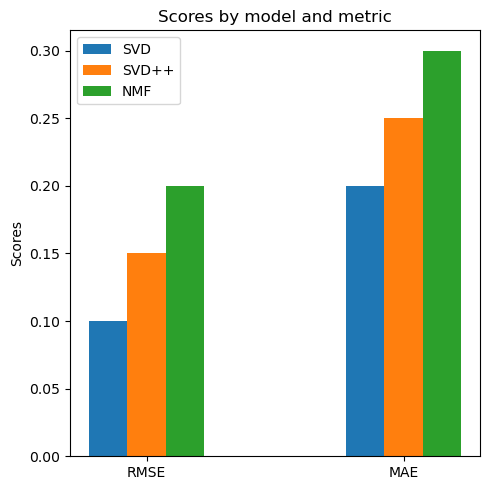

In [58]:
labels = ['RMSE', 'MAE']

svd_scores = [svd_rmse, svd_mae]
svdpp_scores = [svdpp_rmse, svdpp_mae]
nmf_scores = [nmf_rmse, nmf_mae]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(x - width, svd_scores, width, label='SVD')
rects2 = ax.bar(x, svdpp_scores, width, label='SVD++')
rects3 = ax.bar(x + width, nmf_scores, width, label='NMF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [64]:
df_test = pd.DataFrame(svd_predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_test.columns = ['UserID', 'MovieID', 'Actual Rating', 'Predicted Rating', 'Details']
# Round predicted ratings to nearest half
df_test['Predicted Rating_rounded'] = df_test['Predicted Rating'].round()
df_test.drop(['Details'], axis=1, inplace=True)
df_test.head(20)

,UserID,MovieID,Actual Rating,Predicted Rating,Predicted Rating_rounded
0,801800,28,4.0,3.970668,4.0
1,1423668,83,4.0,3.923044,4.0
2,2299957,33,5.0,4.060437,4.0
3,2070952,28,3.0,3.800646,4.0
4,277099,143,3.0,3.955946,4.0
5,11424,133,5.0,3.511759,4.0
6,2382505,143,4.0,4.006191,4.0
7,1982434,145,3.0,2.797178,3.0
8,1485835,28,4.0,3.867430,4.0
9,419369,17,4.0,2.953828,3.0
